# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice, i.e. a total of 5 models are to be trained.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Age of candidates base of party

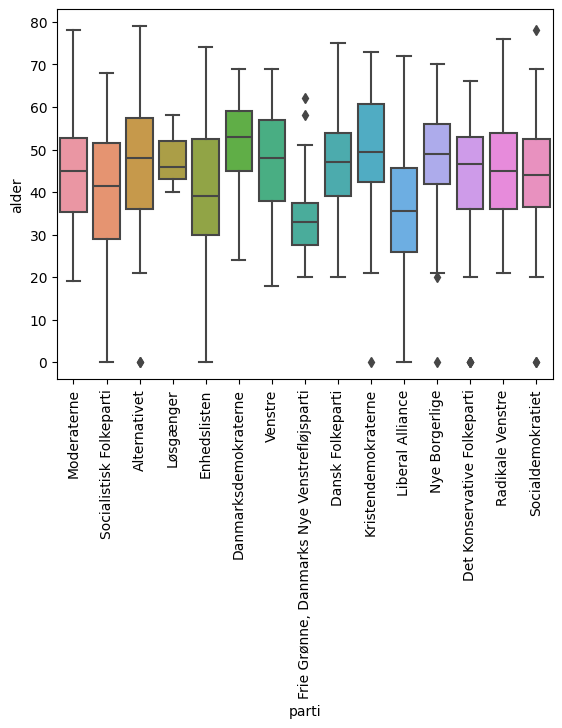

In [33]:
df = pd.read_excel("alldata.xlsx")
sns.boxplot(data=df, x="parti", y="alder")
plt.xticks(rotation=90)
plt.show()

## Overview of most "confident" candidates

In [34]:
overview_df = pd.read_excel("alldata.xlsx").drop(columns=['alder', 'parti', 'storkreds'])

def extreme_values(row):
    total_answers = len(row)
    extreme_count = ((row == -2) | (row == 2)).sum()
    return extreme_count / total_answers

overview_df['extreme_proportion'] = overview_df[overview_df.select_dtypes(include=['number']).columns].apply(extreme_values, axis=1)

display(overview_df.sort_values(by='extreme_proportion', ascending=False)[['navn', 'extreme_proportion']].head(10))

,navn,extreme_proportion
505,Sarah Nørris,1.000000
88,Søren Vanting,1.000000
559,Kim Andkjær Doberck,0.897959
152,Rashid Ali,0.877551
44,Mohamed Abdikarim,0.877551
503,Jan Filbært,0.857143
151,Elise Bjerkrheim,0.857143
284,John Bjerg,0.857143
437,Lone Vase Langballe,0.857143
359,Frank Sørensen,0.857143


## Deviation across all candidates

In [35]:
tv2q = pd.read_excel("tv2q.xlsx")
tv2q = tv2q.drop(['type', 'depends'], axis=1)
tv2q = tv2q.rename(columns={
    'id': 'ID',
    'header': 'Title',
    'question' : 'Question'
})
drq = pd.read_excel("drq.xlsx") 
drq = drq.drop(['Info', 'WordMerger', 'ID_CandidateQuestionType', 'QuestionListData',
              'ArgumentFor', 'ArgumentAgainst', 'Rule', 'QuestionListData'], axis=1)
questions = pd.concat([tv2q, drq])
questions.shape

(99, 3)

In [36]:
df = pd.read_excel("alldata.xlsx")
display(df.shape)

(867, 53)

It seems that the most controversial questions surround handling immigrants and the arne-pension

In [37]:
description = df.drop(columns=['alder'], index=1).describe()
# After taking the standard deviation of all question, we can see that the most dispersed questions are 555, and 556
description = description.iloc[2].sort_values(ascending=False).to_frame().reset_index().rename(columns={'index': 'ID'})
description['ID'] = description["ID"].astype(str)
questions['ID'] = questions['ID'].astype(str)
combined = (questions.merge(description, how="right", on="ID").sort_values(by="std", ascending=False))
combined.head(10)

,ID,Title,Question,std
0,555,EU OG UDENRIGS,Asylansøgere bør sendes til et land uden for E...,1.659853
1,556,ARBEJDSMARKED OG ØKONOMI,Den såkaldte Arne-pension skal afskaffes,1.646493
2,546,KLIMA OG ENERGI,Danmark skal undersøge muligheden for at udvik...,1.621924
3,10b,Socialområdet,"Den såkaldte Arne-pension, der giver mulighed ...",1.615923
4,531,ARBEJDSMARKED OG ØKONOMI,Der skal indføres en særlig skat på de allerhø...,1.614926
5,6b,Flygtninge og indvandrere,Det vil være en god idé at etablere et dansk a...,1.605488
6,6a,Flygtninge og indvandrere,Den danske udlændingepolitik er for stram.,1.605232
7,544,DEMOKRATI,Transkønnede under 18 år skal have mulighed fo...,1.603658
8,11b,Mink-sagen,"Det bør undersøges, om Mette Frederiksen kan s...",1.601701
9,550,ARBEJDSMARKED OG ØKONOMI,"Der skal indføres kvoter, der sikrer mindst 30...",1.586611


## Deviation within parties

In [38]:
df = pd.read_excel("alldata.xlsx")
df = df.drop(columns=['storkreds', 'alder', 'navn']).groupby('parti').std() \
    .reset_index().rename(columns={'index': 'parti'})

columns = df.drop(columns=['parti']).columns.to_list()

df['deviation_sum'] = df[columns].sum(axis=1)
df[['parti', 'deviation_sum']].sort_values(by='deviation_sum', ascending=False)

,parti,deviation_sum
8,Løsgænger,71.061293
6,Kristendemokraterne,50.492682
0,Alternativet,44.572776
9,Moderaterne,43.646967
2,Dansk Folkeparti,43.512455
3,Det Konservative Folkeparti,43.477805
11,Radikale Venstre,42.004607
14,Venstre,40.899156
12,Socialdemokratiet,40.431914
7,Liberal Alliance,35.804793


## Plot of opinions

In [39]:
df = pd.read_excel("alldata.xlsx")
df = df[['555', '556', 'parti']].groupby('parti').mean()

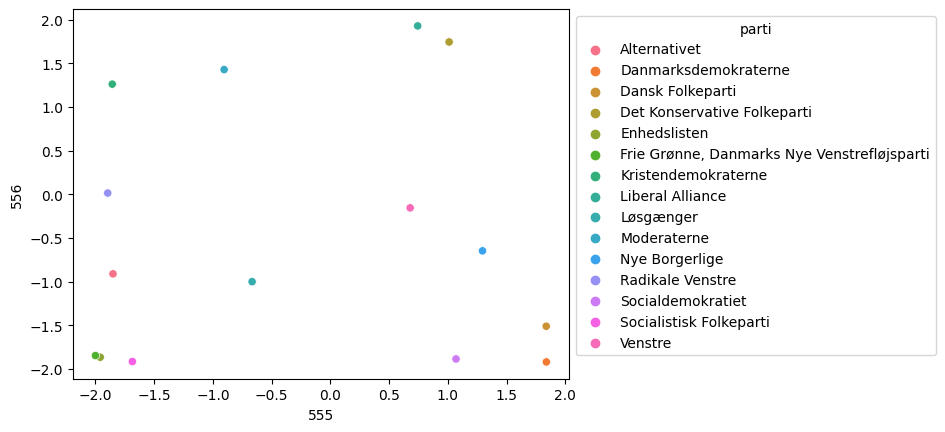

In [40]:

# As mentioned earlier, these 2 questions prove to have most distributed answers
ax = sns.scatterplot(data=df, x="555", y="556", hue="parti", legend=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Models

In [41]:
# data for predicting
data = pd.read_excel("alldata.xlsx").drop(columns=["storkreds","alder"])
pred_data = data.drop(columns=['navn', 'parti'])
# data for model training
df = pd.read_excel("alldata.xlsx").drop(columns=["alder", "storkreds", "navn"])
X = df.drop(columns="parti")
y = df["parti"]

Using label encoder for the dependend data

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=403)

In [44]:
def prediction_frame(predictions):
    return pd.DataFrame({
        'navn': data['navn'],
        'parti': data['parti'],
        'predicted_parti': le.inverse_transform(predictions)
    })

### Descision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier(random_state=403)
regressor.fit(X_train, y_train)
display(regressor.score(X_test, y_test))

0.7701149425287356

In [46]:
res = prediction_frame(regressor.predict(pred_data.values))
res[res['parti'] != res['predicted_parti']]

/Users/asilins/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,navn,parti,predicted_parti
55,Karin Liltorp,Moderaterne,Dansk Folkeparti
59,Kristian Søndergaard Larsen,Kristendemokraterne,Dansk Folkeparti
64,Rolf Bjerre,Kristendemokraterne,Nye Borgerlige
65,Michael Valentin Ilsø,Liberal Alliance,Nye Borgerlige
85,Jes Halfdan,Nye Borgerlige,Dansk Folkeparti
127,Dorthe Hecht,Enhedslisten,Kristendemokraterne
234,Joachim Plaetner Kjeldsen,Alternativet,Radikale Venstre
249,Maja Torp,Venstre,Det Konservative Folkeparti
253,Henrik Buchhave,Venstre,Danmarksdemokraterne
255,Torsten Schack Pedersen,Venstre,Danmarksdemokraterne


### Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators = 1000, random_state = 403)
regressor.fit(X_train, y_train)
display(regressor.score(X_test, y_test))

0.9540229885057471

In [48]:
res = prediction_frame(regressor.predict(pred_data.values))
res[res['parti'] != res['predicted_parti']]

/Users/asilins/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,navn,parti,predicted_parti
234,Joachim Plaetner Kjeldsen,Alternativet,Radikale Venstre
271,Kenneth Skatka Hammer,Liberal Alliance,Det Konservative Folkeparti
507,Kenneth Fredslund Petersen,Danmarksdemokraterne,Venstre
674,Claus Bedemann,Nye Borgerlige,Dansk Folkeparti
678,Jacob Stryhn,Det Konservative Folkeparti,Venstre
733,Clara Rebecca Svarc,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Alternativet
787,Irina Bjørnø,Alternativet,Moderaterne
816,Lars Prier,Dansk Folkeparti,Det Konservative Folkeparti


### Gradiant Boosting Classfier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
regressor = GradientBoostingClassifier(learning_rate=0.1, n_estimators=1000)
regressor.fit(X_train, y_train)
display(regressor.score(X_test, y_test))

0.867816091954023

In [50]:
res = prediction_frame(regressor.predict(pred_data.values))
res[res['parti'] != res['predicted_parti']]

/Users/asilins/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


,navn,parti,predicted_parti
59,Kristian Søndergaard Larsen,Kristendemokraterne,Radikale Venstre
85,Jes Halfdan,Nye Borgerlige,Dansk Folkeparti
150,Sikandar Siddique,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Alternativet
201,Helle Bonnesen,Det Konservative Folkeparti,Venstre
234,Joachim Plaetner Kjeldsen,Alternativet,Radikale Venstre
275,Dorte M. Nielsen,Socialistisk Folkeparti,Enhedslisten
356,Cheanne Nielsen,Dansk Folkeparti,Løsgænger
411,Kirsten Hindbo,Alternativet,"Frie Grønne, Danmarks Nye Venstrefløjsparti"
417,Charlotte Lindberg,Enhedslisten,"Frie Grønne, Danmarks Nye Venstrefløjsparti"
481,Michael Flarup,Radikale Venstre,Socialistisk Folkeparti


Scaling the data for Logistic and k nearest neighbour regression

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression(random_state = 403, max_iter=5000)
regressor.fit(X_train, y_train)
display(regressor.score(X_test, y_test))

0.9195402298850575

In [53]:
res = prediction_frame(regressor.predict(sc.transform(pred_data)))
res[res['parti'] != res['predicted_parti']]

,navn,parti,predicted_parti
37,Gustav Juul,Venstre,Det Konservative Folkeparti
91,Kristian Damsgaard,Det Konservative Folkeparti,Venstre
94,Frederikke Noa Jung,Det Konservative Folkeparti,Liberal Alliance
139,Linea Søgaard-Lidell,Venstre,Det Konservative Folkeparti
234,Joachim Plaetner Kjeldsen,Alternativet,Radikale Venstre
271,Kenneth Skatka Hammer,Liberal Alliance,Venstre
349,Bo Sandberg,Venstre,Det Konservative Folkeparti
369,Sinus Kremmer,Liberal Alliance,Det Konservative Folkeparti
417,Charlotte Lindberg,Enhedslisten,"Frie Grønne, Danmarks Nye Venstrefløjsparti"
431,Ib Bjerregaard,Venstre,Det Konservative Folkeparti


### K Neighbours Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier
regressor = KNeighborsClassifier(n_neighbors = 3)
regressor.fit(X_train, y_train)
display(regressor.score(X_test, y_test))

0.9425287356321839

In [55]:
res = prediction_frame(regressor.predict(sc.transform(pred_data)))
res[res['parti'] != res['predicted_parti']]

,navn,parti,predicted_parti
0,Lars Philipsen Prahm,Moderaterne,Venstre
1,Karsten Hønge,Socialistisk Folkeparti,Enhedslisten
3,Nicklas Gjedsig Larsen,Alternativet,Socialistisk Folkeparti
4,Tom Gillesberg,Løsgænger,Enhedslisten
8,Chresten H. Ibsen,Løsgænger,Radikale Venstre
...,...,...,...
813,Mikkel S. Dencker,Dansk Folkeparti,Danmarksdemokraterne
816,Lars Prier,Dansk Folkeparti,Venstre
827,Jørgen Mathow-Juhl,Liberal Alliance,Det Konservative Folkeparti
844,Henrik Sørensen,Det Konservative Folkeparti,Liberal Alliance
